РЕКУРСИЯ

**Рекурсия** - функция, которая вызывает саму себя. 

Однако, чтобы рекурсивная функция не превращалась в бесконечный цикл, она, подобно циклу, должна иметь определенный способ управлять количеством своих повторов. \
В ситуации когда не предусмотрен способ остановки рекурсивных вызовов происходит переполнение аппаратного стека и возбуждается исключение *RecursionError*. 

**Глубина рекурсии** - количество раз, которые функция вызывает саму себя

In [ ]:
#Пример
def message(times):
    if times > 0:
        print('Это рекурсивная функция')
        message(times - 1)
        
message(5)

в этом примере глубина рекурсии = 5 \

message(5) вызывается из основной программы \
message(4), message(3), message(2), message(1), message(0) рекурсивные вызовы \

В вызове message(0) условие становится ложным и функция завершает свою работу.  Поток управления программы возвращается из шестого экземпляра функции в точку в пятом экземпляре непосредственно после вызова рекурсивной функции.



**Базовый случай** - крайний случай(или несколько), в котором задача может быть решена без рекурсии

**Рекурсивный случай** - мы определяем то, как задача будет решаться рекурсивно во всех остальных случаях. Рекурсивный метод вызывает сам себя с уменьшенным вариантом исходной задачи

In [ ]:
def factorial(n):
    if n == 0:
        return 1                        # базовый случай
    else:
        return n * factorial(n-1)       # рекурсивный случай

Хвостовая рекурсия — частный случай рекурсии, при котором сначала происходит рекурсивный вызов, а потом возврат функции.

In [ ]:
#Обычная рекурсия
def rec1(n):
    if n > 0:
        print(n)
        rec1(n - 1)

#Хвостовая рекурсия
def rec2(n):
    if n > 0:
        rec2(n - 1)
        print(n)

rec1(3)
rec2(3)

In [ ]:
#Пример
#Задача: функция print_digits(number) принимает на вход натуральное число number и выводит все цифры числа number, начиная с младших разрядов, т.е. с конца
#print_digits(12345) должна вывести 5 4 3 2 1

def print_digits(number):
    print(number % 10) # отрезаем последнюю цифру числа
    if number // 10 > 0: # если впереди еще остались цифры
        print_digits(number // 10) # вызываем ту же самую функцию для оставшейся части

#Та же самая задача, только теперь функция должна выводить цифры, начиная со старшего разряда, т.е. с начала
#print_digits(12345) должна вывести 1 2 3 4 5
def print_reverse_digits(number):
    if number // 10 > 0:
        print_reverse_digits(number // 10) # сначала рекусивный вызов, а потом печать
    print(number % 10)


print_digits(12345)
print()
print_reverse_digits(12345)

Рекурсию также можно использовать в **лямбда функциях.**

Пример: \
Задача: реализовать функцию to_binary(number), которая вернет двоичное предсталвение числа number
Алгоритм перевода числа из десятичной системы счисления в двоичную: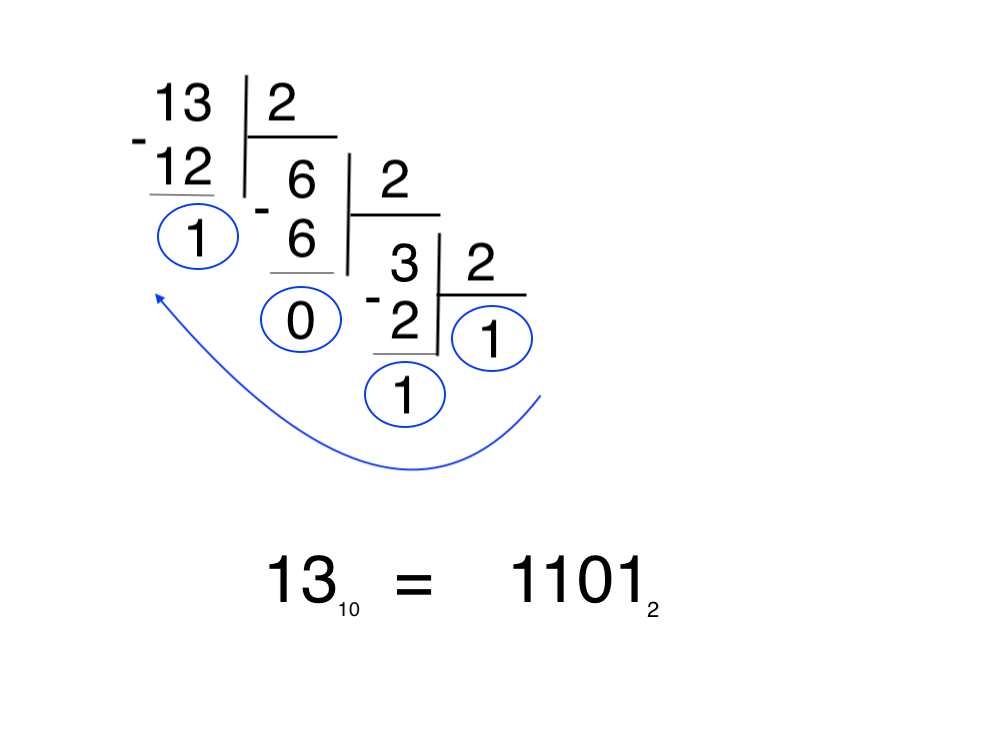



In [ ]:
to_binary = lambda n: str(n % 2) if n // 2 == 0 else to_binary(n // 2) + str(n % 2)

print(to_binary(int(input())))

13
1101


МЕМОИЗАЦИЯ

**Мемоизация** – это способ оптимизации, при котором сохраняется результат выполнения функции, и этот результат используется при следующем вызове.

In [ ]:
#Рекурсивное вычисление чисел фибоначи без мемоизации
def fib(n):
    if n <= 2:
        return 1  
    else:
        return fib(n - 1) + fib(n - 2)


#Рекурсивное вычисление чисел фибоначи с мемоизацией 
#При такой реализации функции fib() сначала происходит проверка на наличие уже вычисленного элемента, и если он найден, то сразу возвращается его значение.
#Приведенная выше реализация функции fib() хороша с точки зрения производительности, поскольку теперь мы не вычисляем много раз одно и то же число Фибоначчи. 
#Но её недостатком является то, что она использует глобальную переменную cache.
cache = {1: 1, 2: 1}   
def upgrade_fib(n):
    result = cache.get(n)
    if result is None:
        result = upgrade_fib(n - 2) + upgrade_fib(n - 1)
        cache[n] = result
    return result

print(fib(5))
print(upgrade_fib(5))

5
5


In [ ]:
#Еще один вариант решения с мемоизацией, используется  словарь атрибутов __dict__ функции
def fib2(num):
    if num < 2:
        return num
    if num not in fib.__dict__: #если значение функции не было вычисленно и закешировано ранее
        fib.num = fib(num - 1) + fib(num - 2) #оно вычисляется и кэшируется
    return fib.num #затем возвращается

**Рекурсивный обход коллекций** \
Рекурсия является незаменимым помощником при работе с вложенными структурами данных.

Пример 1: \
Задача: Реализуйте recursive_sum() с использованием рекурсии, которая принимает один аргумент:

array — список, элементами которого являются целые числа или списки, элементами которых, в свою очередь, также являются либо целые числа, либо списки; вложенность может быть произвольной

Функция должна вычислять сумму всех чисел во всех списках и возвращать полученный результат. 

In [ ]:
def recursive_sum(array):
    res = 0 
    if isinstance(array, int): #базовый случай, если функции в качестве аргумента передали одно число
        res += array
    else:
        for elem in array: #проходимся по всем элментам списка
            if isinstance(array, int): #если элемент число, суммируем
                res += array
            else:
                res += recursive_sum(elem) #если элемент список, обрабатываем его снова через рекурсию
    return res

my_list = [1, [4, 4], 2, [1, [2, 10]]]

print(recursive_sum(my_list))


24


Пример 2: \
Задача: Дан словарь произвольной вложенности, то есть значениями в словаре могут быть другие словари. Необходимо определить значение, которое соответствует заданному ключу, и вернуть его. При этом гарантируется, что такой ключ имеется в словаре, причем он единственный. 

Решение. Реализуем рекурсивную функцию find_key(), которая принимает два аргумента в следующем порядке:
* data — словарь произвольной вложенности
* key — ключ, значение которого нужно вернуть

In [ ]:
def find_key(data, key):
    if key in data:
        return data[key]                # базовый случай;  он простой: если ключ есть в словаре, вернем его значение.
    
    for k, v in data.items(): #проходимся по всем элементам словаря
        if type(v) == dict:   #если значением является вложенный словарь, то мы используем рекурсию
            value = find_key(v, key)    # рекурсивный случай 
            if value is not None: #если во вложенном словаре нашелся ответ, возвращаем его
                return value 